<a href="https://colab.research.google.com/github/kejsida33/kejsis/blob/master/Laborator_2__Koci_Kejsi_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
import scipy.fftpack
from scipy import signal
from scipy.stats import kurtosis, skew
from scipy import signal as sg
from scipy.stats import kurtosis, skew
from sklearn.decomposition import FastICA, PCA

#Încărcarea datelor în colaboratory
Din diferite surse:
- google drive
- local drive
- **github**

Folosind comanda git clone se va incarca tot continutul repositoriului github.

In [2]:
!ls

S1.mat	sample_data  variables.mat


# Descrierea fișierelor incluse
- **variables.mat**


> date pentru a demonstra conceptele teoretice: reprezentarea in timp si frecvență, extragere trăsături

```
data60 - semnal sinusoidal de 60Hz
data5Mix60 - semnal cu frecvențe mixte
```

- **S1.mat**


> exemple semnal EEG extrase din baza de date eldBeta

Type: dict
EEG - contine datele inregistrate
Suppl_info
- SID
- Varsta
- Sex
- Canal inregistrate (numar, coordonate, denumire)
- Frecventa de stimulare
- Indice de calitate semnal




























#Citirea datelor din fișier
- .csv
- .xls/.xlsx
- .txt
- .jpeg
- .h5 (hdf5 files)
- .pyc (pickle files)
- **.mat**

Pentru datele .mat - librăria scipy.io
*sio.loadmat('path to file')*

Datele sunt stocare într-o variabilă de tip dictionar.
Pentru a vedea variabilele incluse in dictionar


In [3]:
#citirea datelor din fișiere .mat -> variabilă de tip dictionar
mat_contents = sio.loadmat('variables.mat')
type(mat_contents)

dict

In [4]:
#vizualizarea variabilelor incluse în dictionar - dict.keys()
print(mat_contents.keys())


dict_keys(['__header__', '__version__', '__globals__', 'data5Mix60', 'data60', 'fs'])


In [5]:
#accesarea variabilelor din dictionar - dict['variabila']
print(mat_contents['fs'])


fs = mat_contents['fs']
print(fs)
print(type(fs))

[[512]]
[[512]]
<class 'numpy.ndarray'>


#Reprezentarea datelor în timp
Vizualizarea semnalelor digitale in domeniul timp

Numărul de eșantioane:384


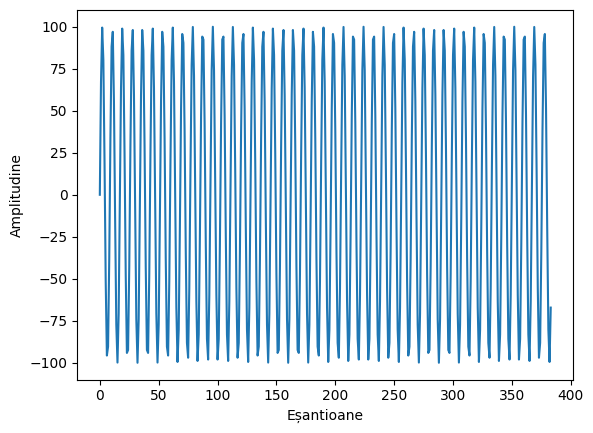

In [6]:
#se accesează semnalul sinusoidal de 60Hz
data60 = mat_contents['data60']

#numărul de eșantioane - lungimea vectorului data60
print('Numărul de eșantioane:' + str(len(data60)))

#reprezentarea grafică a semnalului
plt.figure()
plt.plot(data60)
plt.xlabel('Eșantioane')
plt.ylabel('Amplitudine')
plt.show()

In [ ]:
#perioada de eșantionare
dt = 1/fs
print('Perioada de esantionare: ' +str(dt))

#vectorul timp
t = np.arange(0.0, (len(data60))/fs, 1/fs)

#dimensiunea vectorului timp si a semnalului trebuie sa fie aceiasi
print(t.shape)
print(data60.shape)



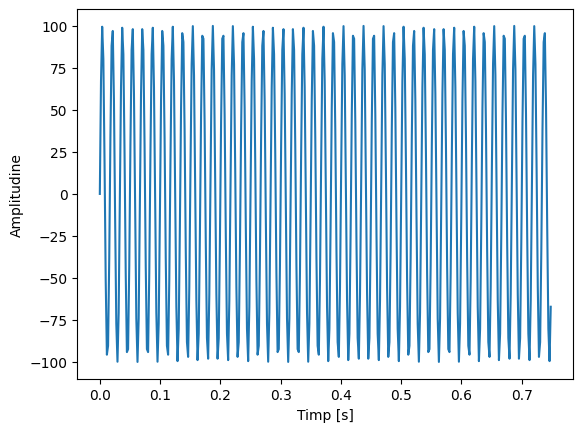

In [8]:
#reprezentarea în domeniul timp
plt.figure()
plt.plot(t,data60)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

#Exercițiu 1
Încărcați semnalul data5Mix60.

1.   Câte eșantioane are semnalul data5Mix60?
2.   Reprezentați semnalul în timp. Perioada de eșantionare este de *0.00195312*






#Reprezentarea în domeniul frecvență
Transformata Fourier Discretă
semnal timp -> fft -> semnal frecvență


Folosind librăria numpy
```
yf = np.fft.rfft(y) # partea reală și positivă a transformatei Fourier
xf = np.fft.rfftfreq(len(y),1/fs) #vectorul frecvență reală
```

```
yf = np.fft.fft(y) #include și partea simetrică a transformatei
xf = np.fft.fftfreq(len(y),1/fs) #vectorul frecvență corespunzător
```

Folosind librăria scipy
```
yf = scipy.fftpack.fft(y) #reprezentarea în frecvență
xf = np.linspace(0, fs/2,len(y)) #vectorul frecvență
```






In [9]:
y = data60

#remodelarea datelor pentru functia numpy fft
print(y.shape)
y = np.reshape(y,(len(y),))
print(y.shape)

(384, 1)
(384,)


ValueError: x and y must have same first dimension, but have shapes (1, 193) and (193,)

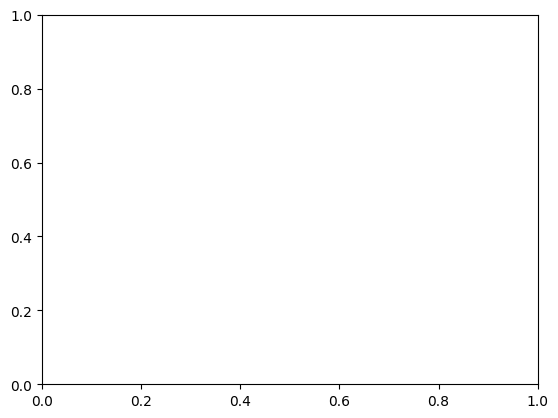

In [10]:
#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

plt.figure()
plt.plot(xf,np.abs(yf))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1, 193) and (193,)

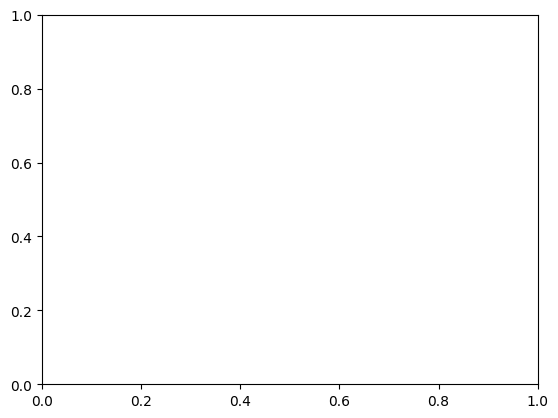

In [11]:
#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

plt.figure()
plt.plot(xf,pf_log)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

#Exercițiu 2
Pentru semnalul data5Mix60 cu frecvența de eșantionare 512Hz:

1.   Calculați și reprezentați grafic transformata fourier
2.   Reprezentați grafic puterea densității spectrale
3.   Care sunt frecvențele dominante prezente în semnal?





#Semnale EEG
Semnale nestationare - conținutul în frecvență se modifică în timp

Variabilitare intra și inter indivizi

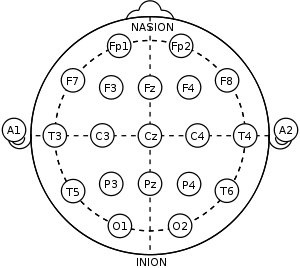

In [12]:
# definirea unor funcții pentru citirea datelor de tip struct din Matlab
def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = sio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [15]:
#citirea datelor din fișierul .mat
#vizualizarea
z = loadmat('S1.mat')
data = z['data']
print(data.keys())

dict_keys(['EEG', 'Suppl_info'])


<ipython-input-12-a306e202c599>:18: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
<ipython-input-12-a306e202c599>:29: DeprecationWarning: Please use `mat_struct` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio5_params` namespace is deprecated.
  if isinstance(elem, sio.matlab.mio5_params.mat_struct):


In [16]:
#informații suplimentare
info = data['Suppl_info']
print(info)

{'Participant_id': 'S1', 'Age': 58, 'Gender': 'male', 'Channel': array([['1', '-17.926', '0.51499', 'FP1'],
       ['2', '0', '0.50669', 'FPZ'],
       ['3', '17.926', '0.51499', 'FP2'],
       ['4', '-22.461', '0.42113', 'AF3'],
       ['5', '22.461', '0.42113', 'AF4'],
       ['6', '-53.913', '0.52808', 'F7'],
       ['7', '-49.405', '0.43159', 'F5'],
       ['8', '-39.947', '0.34459', 'F3'],
       ['9', '-23.493', '0.27903', 'F1'],
       ['10', '0', '0.25338', 'FZ'],
       ['11', '23.493', '0.27878', 'F2'],
       ['12', '39.897', '0.3445', 'F4'],
       ['13', '49.405', '0.43128', 'F6'],
       ['14', '53.867', '0.52807', 'F8'],
       ['15', '-71.948', '0.53192', 'FT7'],
       ['16', '-69.332', '0.40823', 'FC5'],
       ['17', '-62.425', '0.28822', 'FC3'],
       ['18', '-44.925', '0.18118', 'FC1'],
       ['19', '0', '0.12662', 'FCZ'],
       ['20', '44.925', '0.18118', 'FC2'],
       ['21', '62.425', '0.28822', 'FC4'],
       ['22', '69.332', '0.40823', 'FC6'],
       ['23',

In [17]:
fs = info['Srate']
channels = info['Channel']
frec_stimulare = info['Frequency']


In [18]:
eeg = data['EEG']
print(eeg)
print(eeg.keys())
print(type(eeg))

{'Epoch': array([[[[-2.05650854e+00, -1.29095955e+01,  1.51171913e+01, ...,
           1.97392197e+01,  6.26430016e+01,  3.40900040e+01],
         [-7.03572083e+00,  1.51828751e-01,  3.02560306e+00, ...,
          -1.11251631e+01, -1.36338959e+01, -4.24649010e+01],
         [ 1.07318020e+00,  2.67105923e+01, -1.50853128e+01, ...,
          -4.10486221e+00,  2.18921041e+00, -1.43756914e+01],
         ...,
         [-1.78186760e+01,  1.73637829e+01, -2.84865723e+01, ...,
           3.66820633e-01,  6.78114033e+00,  4.65968943e+00],
         [-1.92328777e+01, -7.90428782e+00, -2.37493382e+01, ...,
           1.43660545e+01,  2.51407051e+00,  1.39132366e+01],
         [ 2.36995196e+00, -3.22295070e+00,  2.91262102e+00, ...,
          -1.23544712e+01, -4.92331409e+00, -2.66256332e+01]],

        [[-3.74189663e+00, -1.72465000e+01,  7.89094353e+00, ...,
           7.68736839e+00,  7.29516373e+01,  5.23045616e+01],
         [ 3.79393959e+00, -1.03110104e+01, -1.49110956e+01, ...,
          -3

In [19]:
eeg_epochs = eeg['Epoch']
print(type(eeg_epochs))

<class 'numpy.ndarray'>


In [20]:
print(np.shape(eeg_epochs))

(64, 1500, 9, 7)


In [21]:
print(np.shape(channels))

(64, 4)


In [22]:
print(np.shape(frec_stimulare))

(9,)


#Semnale EEG în timp

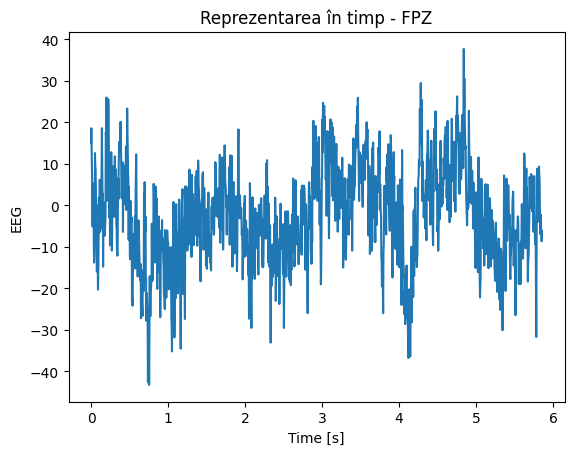

In [23]:
#reprezentarea în timp a canalului FPZ
data = eeg_epochs[1,:,3,3]
fs = 256

t = np.arange(0.0, (len(data))/fs, 1/fs)

plt.figure()
plt.plot(t,data)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp - ' +str(channels[1][3]))
plt.show()


#Semnale EEG în frecvență

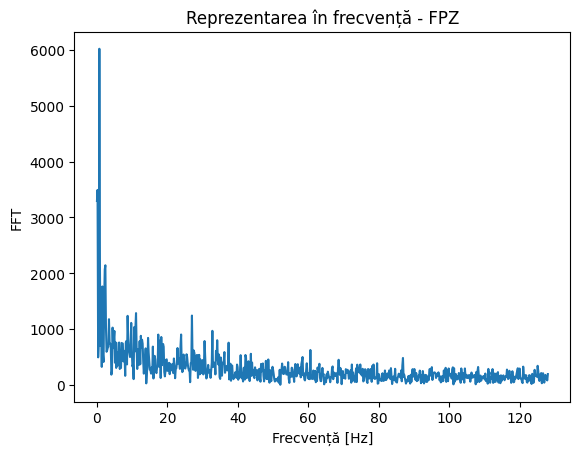

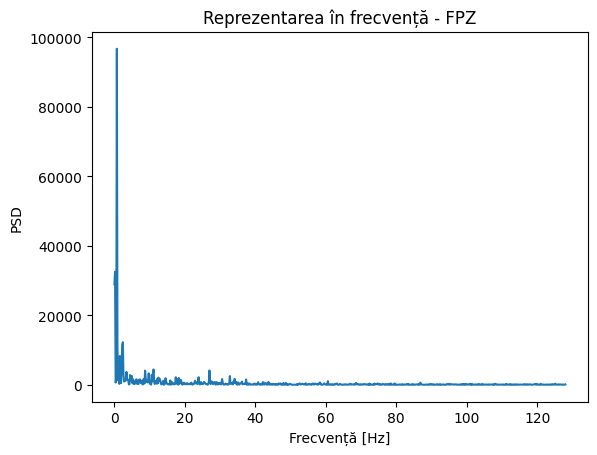

In [24]:
#reprezentarea în frecvență a canalului FPZ
y = eeg_epochs[1,:,3,3]
y = np.reshape(y,(len(y),))

#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

plt.figure()
plt.plot(xf,np.abs(yf))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[1][3]))
plt.show()

#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență - ' +str(channels[1][3]))
plt.show()


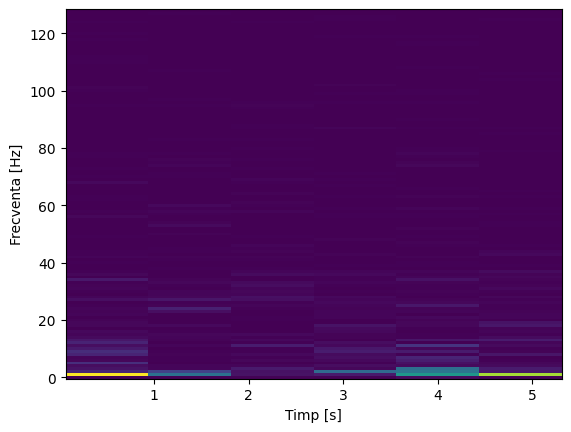

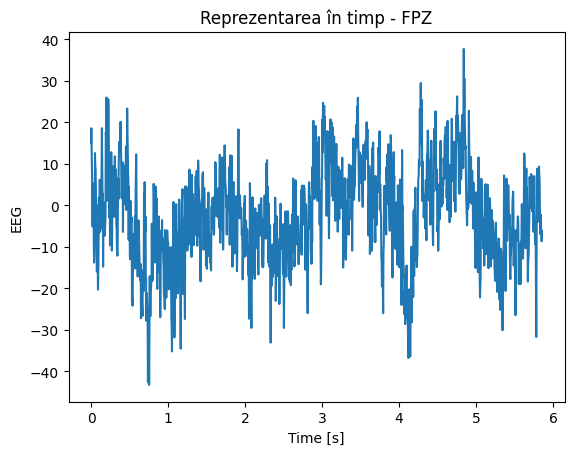

In [25]:
#spectrograma canalului FPZ
f, t, Sxx = signal.spectrogram(y, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frecventa [Hz]')
plt.xlabel('Timp [s]')
plt.show()

t = np.arange(0.0, (len(data))/fs, 1/fs)

plt.figure()
plt.plot(t,data)
plt.xlabel('Time [s]')
plt.ylabel('EEG')
plt.title('Reprezentarea în timp - ' +str(channels[1][3]))
plt.show()

#Exercițiu 3a
Alegeți două semnale EEG din setul de date propus în variabila  - un semnal din zona frontală și unul din zona occipitală.

1.   Reprezentați în timp cele două semnale.
2.   Există diferențe observabile vizual?
3.   Reprezentați în frecvență cele două semnale. Observați vizual diferențele? Dacă da, care este cauza?
4.   Dar dacă le reprezentați cu ajutorul unei spectrograme?



#Exercițiu 3b

Reprezentați grafic atât în timp cât și în frecvență semnalele înregistrate pe canalul PO4 pentru toate frecvențele de stimulare. Care semnale arată un răspuns SSVEP mai puternic?

#Descriptori în timp și frecvență



##Reprezentare în timp
- descriptori care caracterizează amplitudinea - amplitudine maximă, minimă, medie etc.
- descriptori statistici - aplatizarea distribuției (kurtosis), asimetria distribuției (skewness).

In [26]:
mat_contents = sio.loadmat('variables.mat')
data60 = mat_contents['data60']

fs = 512

t = np.arange(0.0, (len(data5Mix60))/fs, 1/fs)

plt.figure()
plt.plot(t,data5Mix60)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.show()

Amax = np.max(data60)
Amin = np.min(data60)
Amean = np.mean(data60)
Akurtosis = kurtosis(data60)
Askew = skew(data60)

print('Amplitudinea maximă: ' + str(Amax))
print('Amplitudinea minimă: ' + str(Amin))
print('Amplitudinea medie: ' + str(Amean))
print('Aplatizarea: ' + str(Akurtosis))
print('Asimetria: ' + str(Askew))

NameError: name 'data5Mix60' is not defined

##Reprezentare în frecvență
- puterea maximă în frecvență
- puterea medie în anumite benzi de frecvență (alpha, beta, theta etc.)

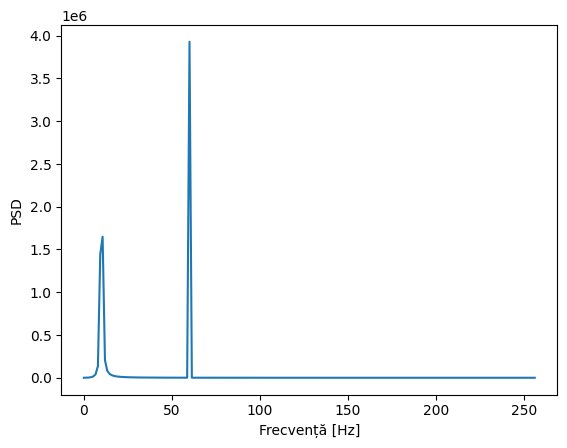

Puterea maximă este de 3927189.1196292685la frecventa de 60 Hz


<ipython-input-27-8f92460d3aac>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Puterea maximă este de ' +str(Pmax)+ 'la frecventa de ' + str(int(Fmax)) +' Hz' )


In [27]:
mat_contents = sio.loadmat('variables.mat')
data5Mix60 = mat_contents['data5Mix60']

y = np.reshape(data5Mix60,(len(data5Mix60),))

#calcularea transformatei Fourier
yf = np.fft.rfft(y)
#vectorul frecvență
xf = np.fft.rfftfreq(len(y),1/fs)

#puterea densității spectrale
pf = (2/len(xf))*np.abs(yf)**2 #puterea in frecventa
pf_log = 20*np.log10(pf) #puterea logaritmică

plt.figure()
plt.plot(xf,pf)
plt.ylabel('PSD')
plt.xlabel('Frecvență [Hz]')
plt.show()

Pmax = np.max(pf)

index_max = np.where(pf == Pmax)
Fmax = xf[index_max]

print('Puterea maximă este de ' +str(Pmax)+ 'la frecventa de ' + str(int(Fmax)) +' Hz' )







#Exercițiu 4a
Încărcați două semnale EEG - dintr-un canal frontal și unul occipital la frecvența de stimulare de 9Hz.
1.   Pentru fiecare din cele două semnale calculați următorii descriptori în timp și afișați rezultatele - amplitudine maximă, minimă,medie, skew, kurtosis.
2.   Se pot diferenția cele două condiții din descriptorii aleși? Motivați răspunsul.
3.   Ce alti descriptori ar mai putea diferenția cele două stări? Implementați încă doi descriptori care ar putea fi utilizați în domeniul timp (căutați în literatură, ex - Tautan et. al 2018, Shoeb & Guttag 2010, Acharya et. al 2013 )






#Exercițiu 4b
Încărcați cele două semnale EEG - eegnormal și eegseizure
1.   Reprezentați semnalele în frecvență
2.   Extrageți, afișați și comparați puterea maximă și frecvența corespunzătoare.
3.   În funcție de activitatea cognitivă, semnalele EEG au diferite caracteristici în diferite benzi de frecvență. Puterea în frecvență variază de la individ la indvid și este de asemenea variabilă în timp. Extrageți puterea medie in benzile theta (4-8Hz) și delta (0.5-3Hz) pentru cele două semnale EEG. Afișați și comparați rezultatele.



#Exercițiu 4c
Pentru a evita cât mai mult posibil variabilitatea între semnale cauzată de ex de diferențe în instrumentele de înregistrare, de diferențe individuale etc., înainte de calcularea descriptorilor semnalele pot fi normalizate: valoarea este transpusă în intervalul [-1,1].
1. Încărcați cele două semnale EEG - zona frontală și zona occipitală
2. Aduceți amplitudinea celor două semnale în intervalul [-1,1]. Reprezentați grafic cele două semnale
3. Recalculați descriptorii de la Exercițiul 4a.
4. Reprezentați semnalele în frecvență. Aduceți puterea în intervalul [0,1]. Reprezentați grafic semnalele ajustate.
5. Recalculați descriptorii de la Exercițiul 4b.
6. Comparați descriptorii pentru semnalul normal și cel epileptic. Se păstrează aceleași diferențe ca și în exercițiile anterioare?


# Pre-procesarea semnalelor

#Filtrare
**Filtre FIR**
* firwin - crează coeficienții filtrului
* lfilter - aplicarea filtrului
* freqz - afișarea răspunsului filtrului

**Low-pass**

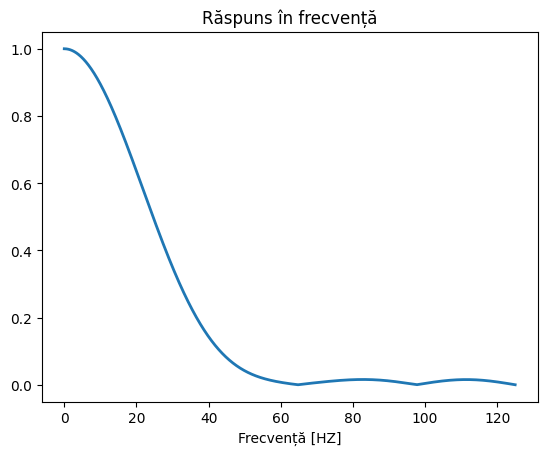

In [29]:
fs = 250
#crearea filtrelor FIR
#frecvența niquist
nq = fs/2
#lățimea benzii de tranziție
width = 5/nq
#atenuarea în banda de oprire
ripple_db = 10


#filtru low-pass (trece jos)
fc = 5 #frecvență cut-off
n = 10 #ordinul filtrului
coef = sg.firwin(n, fc/nq)


#reprezentarea răspunsului în frecvență
w,h = sg.freqz(coef, worN=8000)
plt.plot((w/np.pi)*nq,np.absolute(h), linewidth=2)
plt.xlabel('Frecvență [HZ]')
plt.title('Răspuns în frecvență')
plt.show()

**High pass**

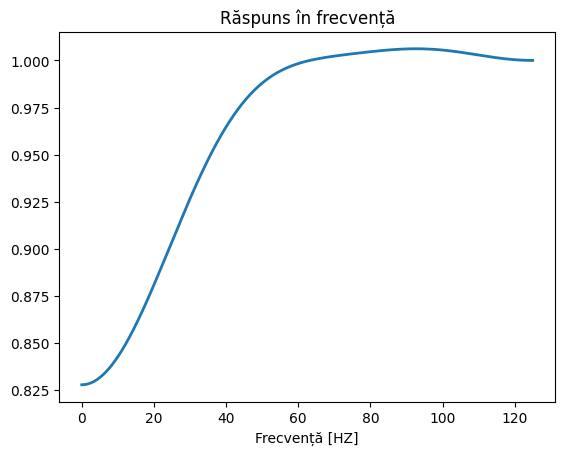

In [28]:
fs = 250
#crearea filtrelor FIR
#frecvența niquist
nq = fs/2
#lățimea benzii de tranziție
width = 5/nq
#atenuarea în banda de oprire
ripple_db = 10


#filtru low-pass (trece jos)
fc = 5 #frecvență cut-off
n = 9 #ordinul filtrului
coef = sg.firwin(n, fc/nq, pass_zero=False)


#reprezentarea răspunsului în frecvență
w,h = sg.freqz(coef, worN=8000)
plt.plot((w/np.pi)*nq,np.absolute(h), linewidth=2)
plt.xlabel('Frecvență [HZ]')
plt.title('Răspuns în frecvență')
plt.show()

**Band-pass**

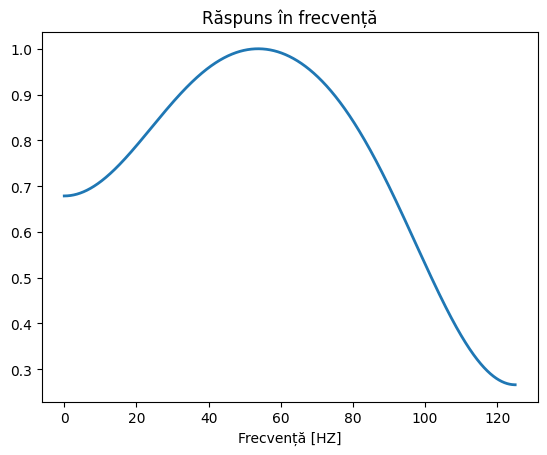

In [30]:
fs = 250
#crearea filtrelor FIR
#frecvența niquist
nq = fs/2
#lățimea benzii de tranziție
width = 5/nq
#atenuarea în banda de oprire
ripple_db = 90


#filtru low-pass (trece jos)
fc1 = 10/nq #frecvență cut-off
fc2 = 100/nq #frecvență cut-off
n = 9 #ordinul filtrului
coef = sg.firwin(n, [fc1, fc2], pass_zero=False)


#reprezentarea răspunsului în frecvență
w,h = sg.freqz(coef, worN=8000)
plt.plot((w/np.pi)*nq,np.absolute(h), linewidth=2)
plt.xlabel('Frecvență [HZ]')
plt.title('Răspuns în frecvență')
plt.show()

**Stop band**

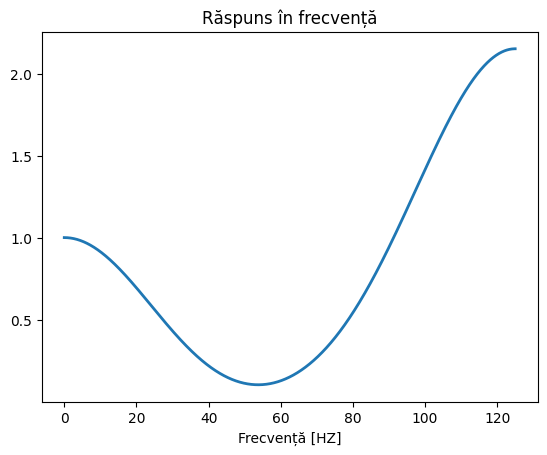

In [31]:
fs = 250
#crearea filtrelor FIR
#frecvența niquist
nq = fs/2
#lățimea benzii de tranziție
width = 5/nq
#atenuarea în banda de oprire
ripple_db = 10


#filtru low-pass (trece jos)
fc1 = 10/nq #frecvență cut-off
fc2 = 100/nq #frecvență cut-off
n = 9 #ordinul filtrului
coef = sg.firwin(n, [fc1, fc2])


#reprezentarea răspunsului în frecvență
w,h = sg.freqz(coef, worN=8000)
plt.plot((w/np.pi)*nq,np.absolute(h), linewidth=2)
plt.xlabel('Frecvență [HZ]')
plt.title('Răspuns în frecvență')
plt.show()

**Filtre IIR**

*   iirfilter - crează coeficienții filtrului



scipy.signal.iirfilter(N, Wn, rp=None, rs=None, btype='band', analog=False, ftype='butter', output='ba', fs=None)




* N - ordinul filtrului

* Wn - frecvențe cut-off - valorile suntr între 0 și 1 acestea fiind normalizate la frecvența Nyquist

* rp - riplu în banda de trecere

* rs - ripul în banda de oprire

* btype - tipul - bandpass, lowpass, highpass, bandstop

* ftype - tipul filtrului - butterworth, chebyshev I, chebyshev II, elliptic, bessel

* output - reprezentarea la ieșire - pole-zero, fracție etc.

* fs - frecvența de eșantionare

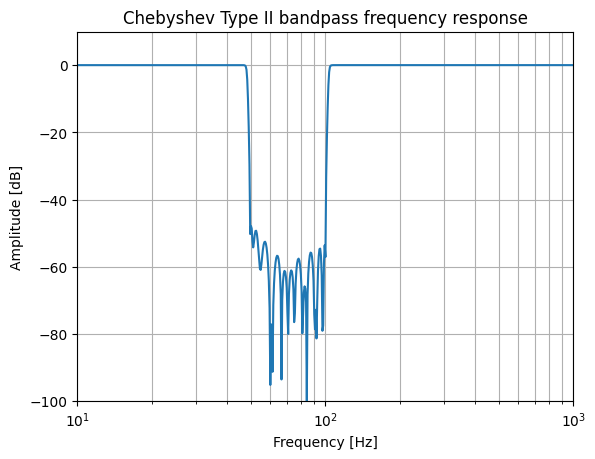

In [32]:
fs = 250
nq = fs/2

fc1 = 50
fc2 = 100


b, a = sg.iirfilter(17, [2*np.pi*fc1, 2*np.pi*fc2], rs=60,
                        btype='bandstop', analog=True, ftype='cheby2')
w, h = sg.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

# Exercițiu 5a
1. Creați un semnal sinusoidal cu o frecvență de 10Hz, amplitudine de 200, frecvență de eșantionare de 250Hz cu durata de 10 secunde. Creați și adăugați un zgomot de frecvență 50Hz cu o amplitudine proporțională cu cea a semnalului inițial.
2. Reprezentați grafic semnalul în timp și frecvență.
3. Aplicați un filtru IIR pentru eliminarea frecvenței de 50Hz.
4. Applicați un filtru pentru eliminarea frecvenței inițiale de 10Hz.

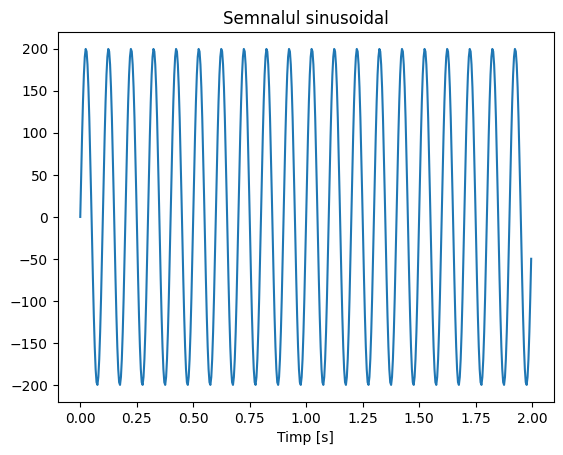

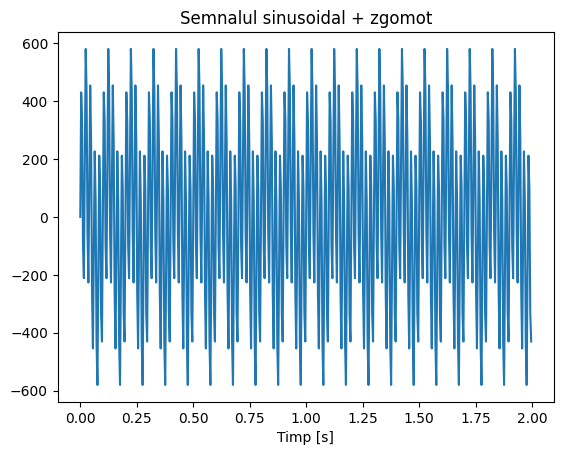

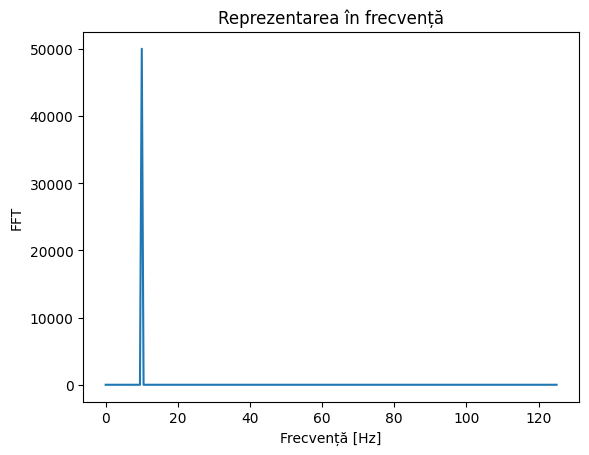

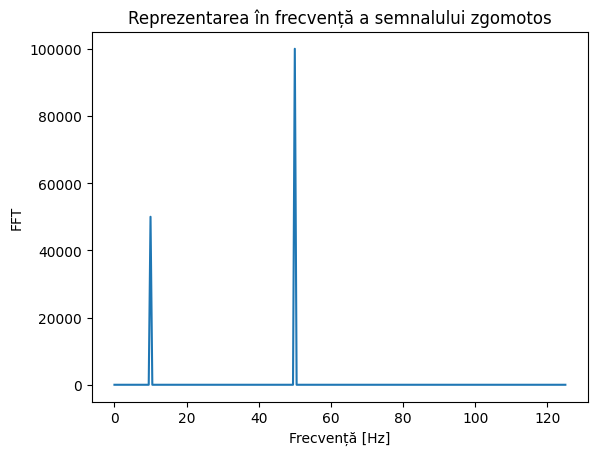

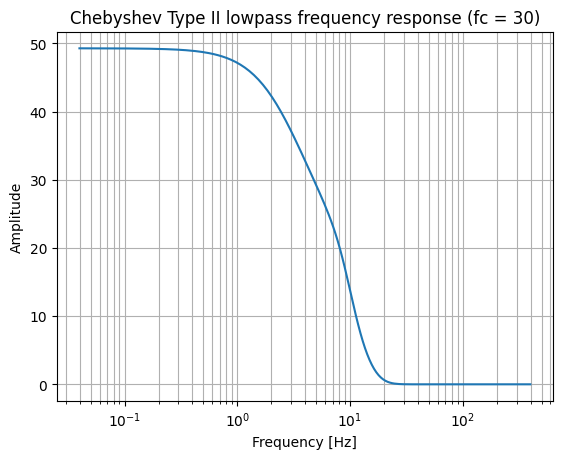

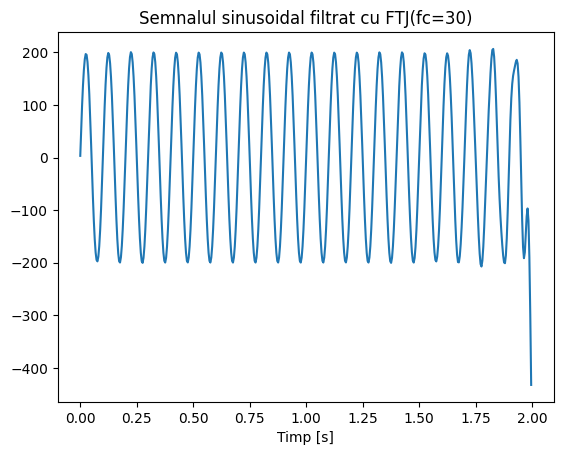

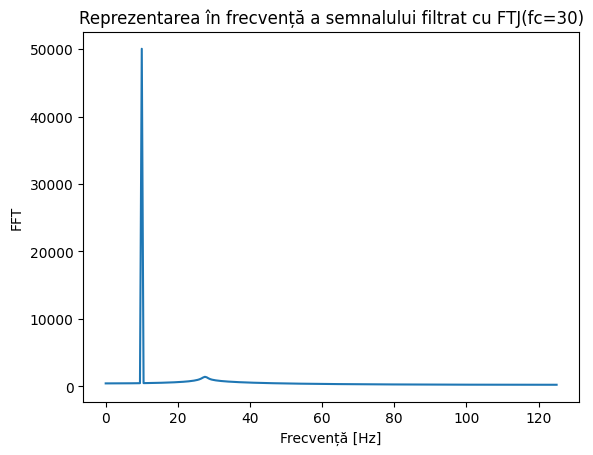

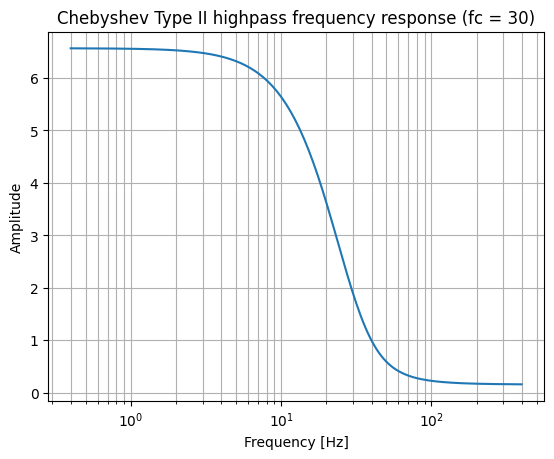

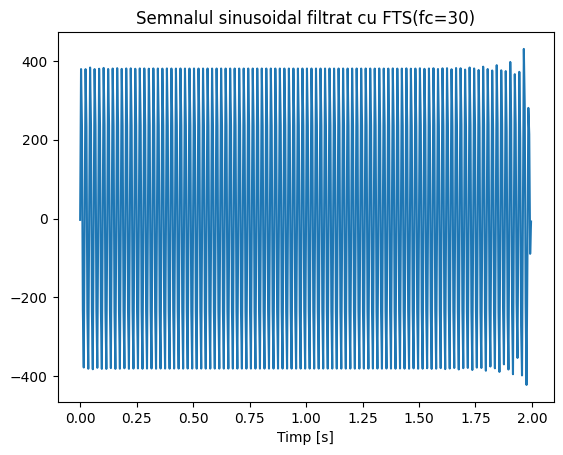

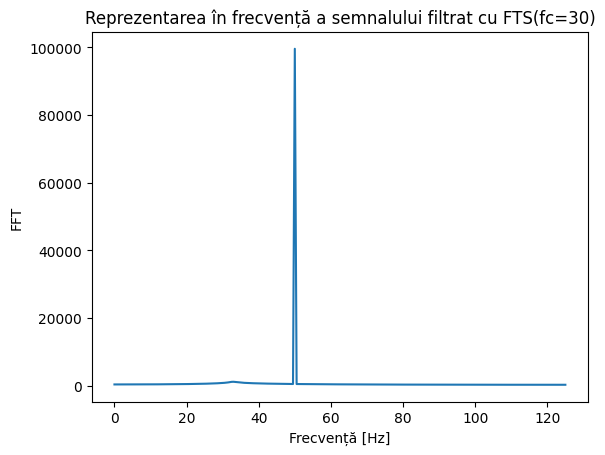

In [33]:
fs = 250
f = 10
t = 2
A = 200

signal = np.zeros(fs*t)
noise = np.zeros(fs*t)

for n in range(0,fs*t):
  signal[n] = A * np.sin(n * np.pi * 2 * f / fs)
  noise[n] = 2*A*np.sin(n*np.pi*2*50/fs)

time = np.arange(0.0,t,1/fs)

plt.plot(time,signal)
plt.xlabel('Timp [s]')
plt.title('Semnalul sinusoidal')
plt.show()

plt.plot(time,signal+noise)
plt.xlabel('Timp [s]')
plt.title('Semnalul sinusoidal + zgomot')
plt.show()

y_signal_f = np.fft.rfft(signal)
x_signal_f = np.fft.rfftfreq(len(signal),1/fs)

plt.figure()
plt.plot(x_signal_f,np.abs(y_signal_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență')
plt.show()

y_signal_zg_f = np.fft.rfft(signal+noise)

plt.figure()
plt.plot(x_signal_f,np.abs(y_signal_zg_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului zgomotos')
plt.show()

nq = fs/2

fc = 30

b, a = sg.iirfilter(17, fc/nq, rs=60,
                        btype='lowpass', ftype='cheby2')
w, h = sg.freqs(b, a)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (np.pi) * nq, (np.abs(h)))
ax.set_title('Chebyshev Type II lowpass frequency response (fc = 30)')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both', axis='both')
plt.show()

signal_filt = sg.filtfilt(b,a,signal+noise)
plt.figure()
plt.plot(time,signal_filt)
plt.xlabel('Timp [s]')
plt.title('Semnalul sinusoidal filtrat cu FTJ(fc=30)')
plt.show()

y_signal_filt_f = np.fft.rfft(signal_filt)

plt.figure()
plt.plot(x_signal_f,np.abs(y_signal_filt_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului filtrat cu FTJ(fc=30)')
plt.show()

fc = 30

b, a = sg.iirfilter(17, fc/nq, rs=60,
                        btype='highpass', ftype='cheby2')
w, h = sg.freqs(b, a)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (np.pi) * nq, (np.abs(h)))
ax.set_title('Chebyshev Type II highpass frequency response (fc = 30)')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both', axis='both')
plt.show()

signal_filt = sg.filtfilt(b,a,signal+noise)
plt.figure()
plt.plot(time,signal_filt)
plt.xlabel('Timp [s]')
plt.title('Semnalul sinusoidal filtrat cu FTS(fc=30)')
plt.show()

y_signal_filt_f = np.fft.rfft(signal_filt)

plt.figure()
plt.plot(x_signal_f,np.abs(y_signal_filt_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului filtrat cu FTS(fc=30)')
plt.show()

#Exercițiu 5b
Selectați unul din semnalele înregistrate pe canalul PO4 la frecvența de stimulare de 9Hz.
1. Adăugați un zgomot de 50Hz
2. Creați și aplicați un filtru pentru eliminarea frecvențelor joase, de drift. Motivați alegerea tipului de filtru și a parametrilor.
3. Creați și aplicați un filtru pentru eliminarea frecvenței de linie.
4. Selectați frecvența de stimulare cu ajutorul unui filtru/unor filtre. Care ar fi dezavantajele aplicării unei astfel de metode de selectare a frecvenței de stimulare?

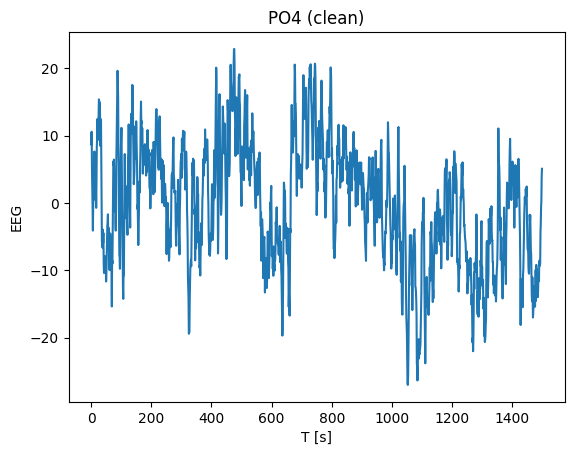

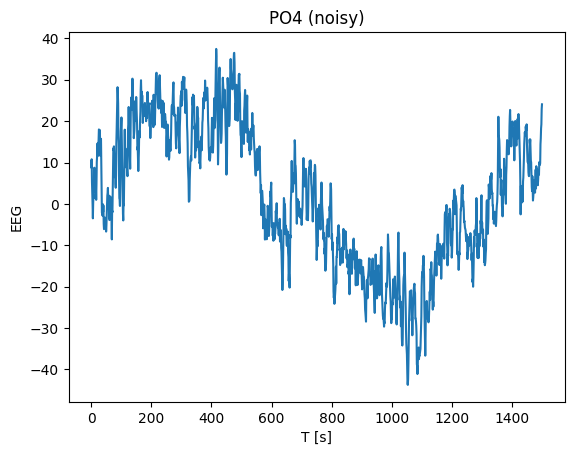

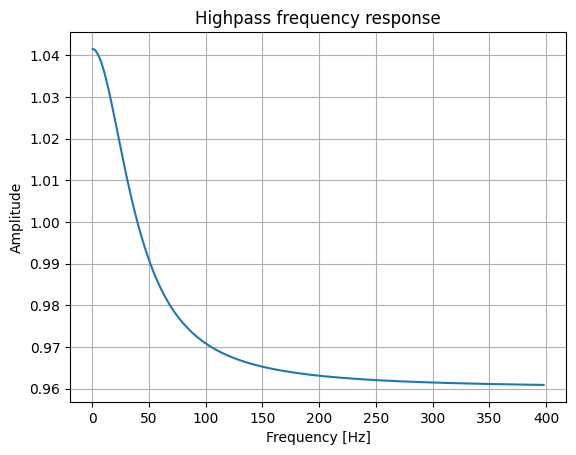

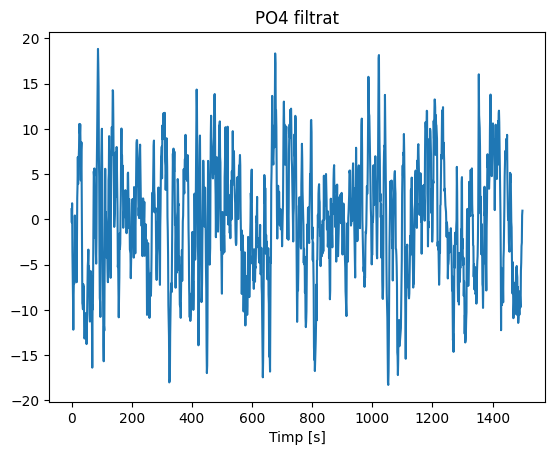

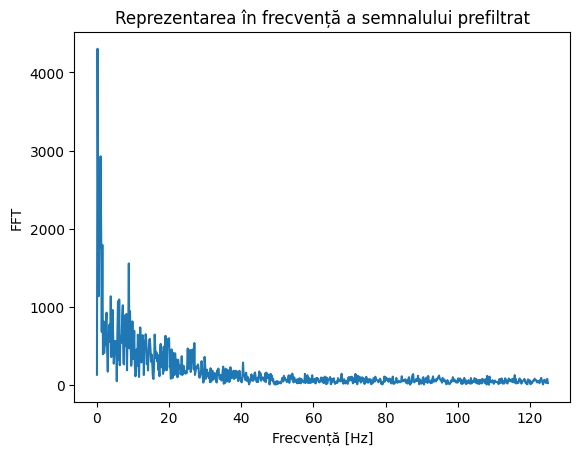

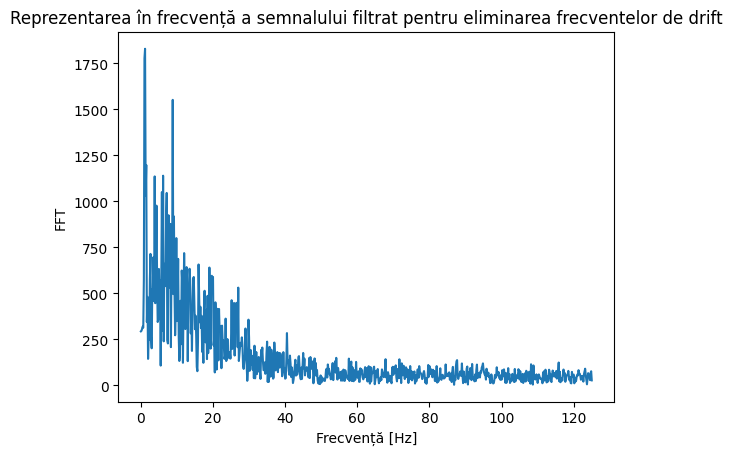

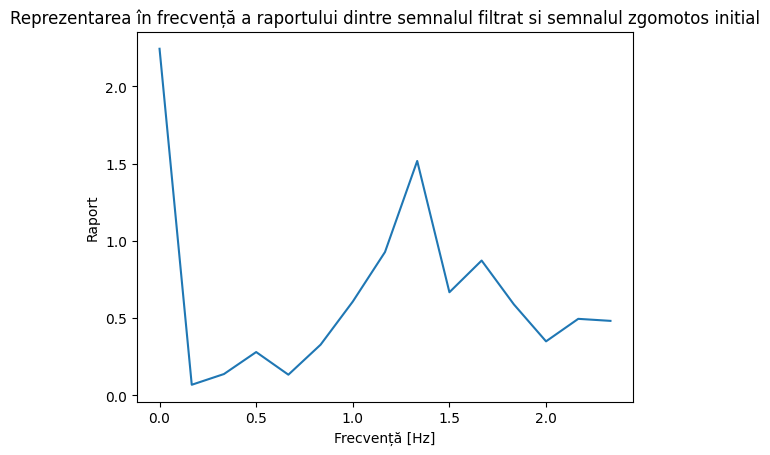

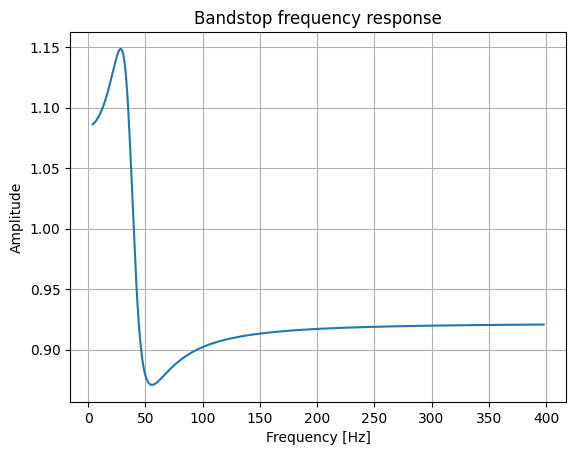

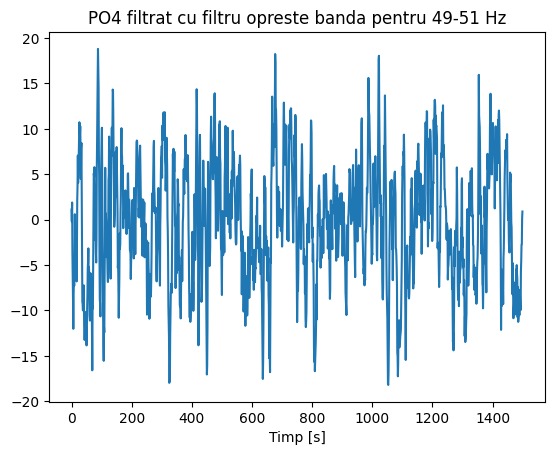

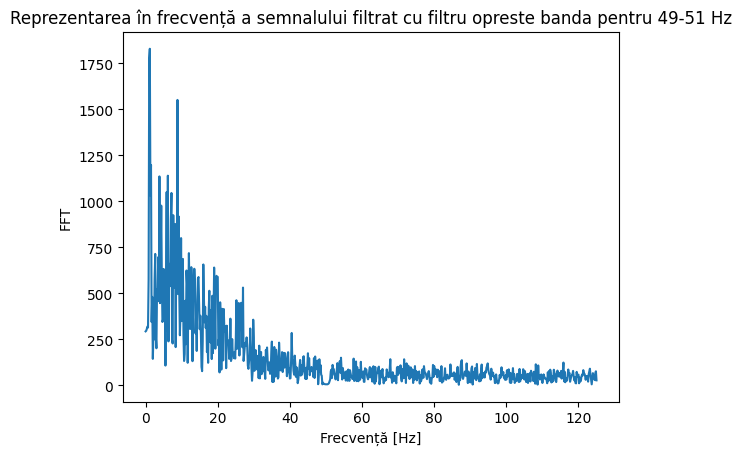

In [35]:
stimulation_frequency = 6
PO4 = eeg_epochs[56,:,stimulation_frequency,3]

t = np.arange(0.0,len(PO4)/fs,1/fs)

fs = info['Srate']
fzg = 50

plt.figure()
plt.plot(PO4)
plt.ylabel('EEG')
plt.xlabel('T [s]')
plt.title('PO4 (clean)')
plt.show()

#1

PO4_zg = PO4 + 20*np.sin(2*np.pi*fzg/fs*t)
plt.figure()
plt.plot(PO4_zg)
plt.ylabel('EEG')
plt.xlabel('T [s]')
plt.title('PO4 (noisy)')
plt.show()

#2

nq = fs/2

fc = 1

b, a = sg.iirfilter(5, fc/nq, btype='highpass', ftype='butter') #Am ales ordinul 7 pentru ca mai multe ordine ar fi provocat un filtru nefunctional (semanulul rezultat ar fi fost un semnal de cateva esantione, inutil), iar ftype='butter' a fost ales pur experimental
w, h = sg.freqs(b, a)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(w / (np.pi) * nq, (np.abs(h)))
ax.set_title('Highpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both', axis='both')
plt.show()

PO4_filt = sg.filtfilt(b,a,PO4_zg)
plt.figure()
plt.plot(PO4_filt)
plt.xlabel('Timp [s]')
plt.title('PO4 filtrat')
plt.show()

y_PO4_zg_f = np.fft.rfft(PO4)
x_PO4_zg_f = np.fft.rfftfreq(len(PO4),1/fs)
plt.figure()
plt.plot(x_PO4_zg_f,np.abs(y_PO4_zg_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului prefiltrat')
plt.show()

y_PO4_filt_f = np.fft.rfft(PO4_filt)
x_PO4_filt_f = np.fft.rfftfreq(len(PO4_filt),1/fs)
plt.figure()
plt.plot(x_PO4_filt_f,np.abs(y_PO4_filt_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului filtrat pentru eliminarea frecventelor de drift')
plt.show()

plt.figure()
plt.plot(x_PO4_filt_f[0:15],np.abs(y_PO4_filt_f)[0:15]/np.abs(y_PO4_zg_f)[0:15])
plt.ylabel('Raport')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a raportului dintre semnalul filtrat si semnalul zgomotos initial')

#3

fc1 = 49
fc2 = 51

b, a = sg.iirfilter(5, [fc1/nq,fc2/nq], btype='bandstop', ftype='butter')
w, h = sg.freqs(b, a)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(w / (np.pi) * nq, (np.abs(h)))
ax.set_title('Bandstop frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.grid(which='both', axis='both')
plt.show()

PO4_filt_50Hz = sg.filtfilt(b,a,PO4_filt)
plt.figure()
plt.plot(PO4_filt_50Hz)
plt.xlabel('Timp [s]')
plt.title('PO4 filtrat cu filtru opreste banda pentru 49-51 Hz')
plt.show()

y_PO4_filt_50Hz_f = np.fft.rfft(PO4_filt_50Hz)
x_PO4_filt_50Hz_f = np.fft.rfftfreq(len(PO4_filt_50Hz),1/fs)
plt.figure()
plt.plot(x_PO4_filt_50Hz_f,np.abs(y_PO4_filt_50Hz_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('Reprezentarea în frecvență a semnalului filtrat cu filtru opreste banda pentru 49-51 Hz')
plt.show()

#Blind Source Separation - separarea surselor
FastICA - crearea transformatei pentru aplicarea ICA

class sklearn.decomposition.FastICA(n_components=None, *, algorithm='parallel', whiten='warn', fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, whiten_solver='svd', random_state=None

fit_transform - aplicarea transformatei și obținerea componentelor independente



```
# Exemplu
transformer = FastICA(n_components=7,random_state=0,whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
```

#Exercițiu 6a
1. Creați următoarele semnale sinusoidale la frecvența de eșantionare de 256Hz:
data1: f = 5Hz, A = 170
data2: f = 15Hz, A = 150
data3: f = 20Hz, A = 100
data_noise: f = 50Hz, A=300
2. Adăugați zgomotul celor trei semnale data1,2,3 și reprezentați grafic semnalele rezultante atât în timp cât și în frecvență.
4. Creați matricea de mixare, aplicați ICA (fastICA) și extrageți trei componente independente. Reprezentați grafic componentele atât în timp cât și în frecvență.

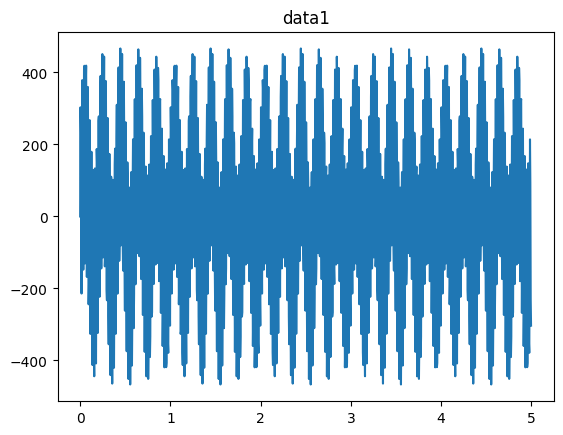

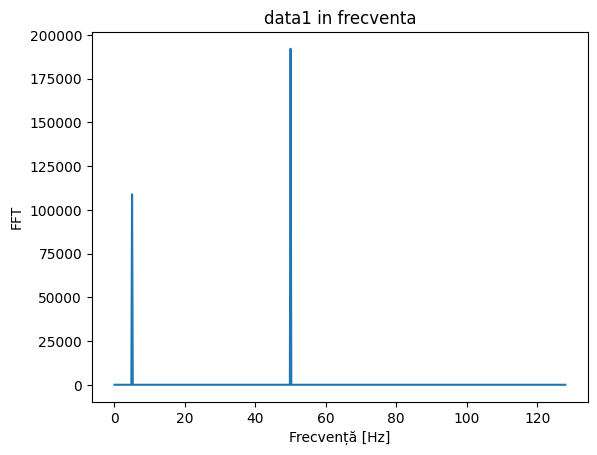

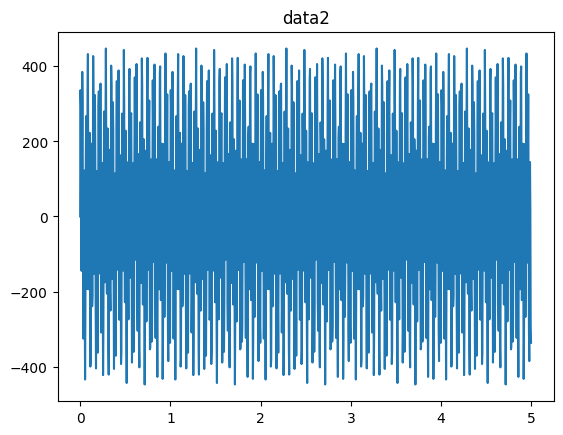

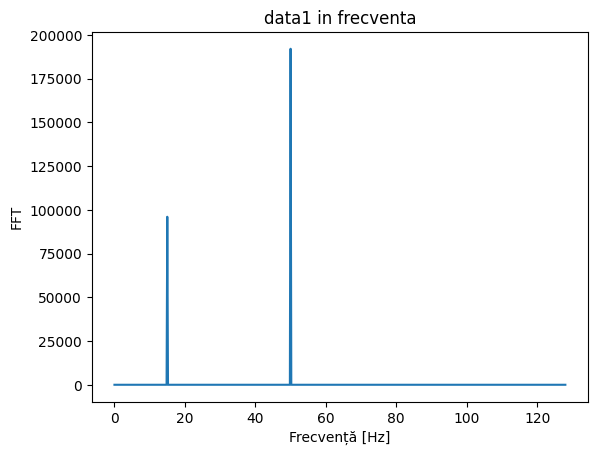

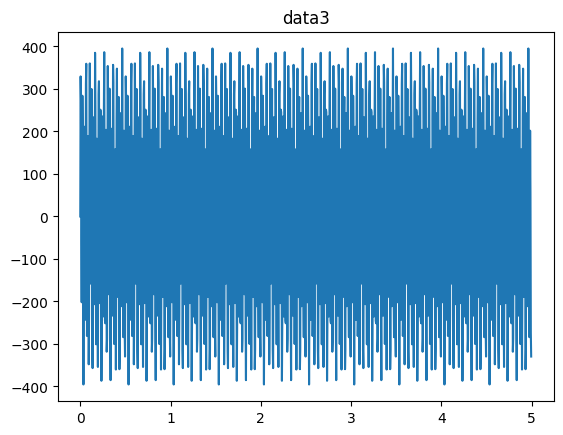

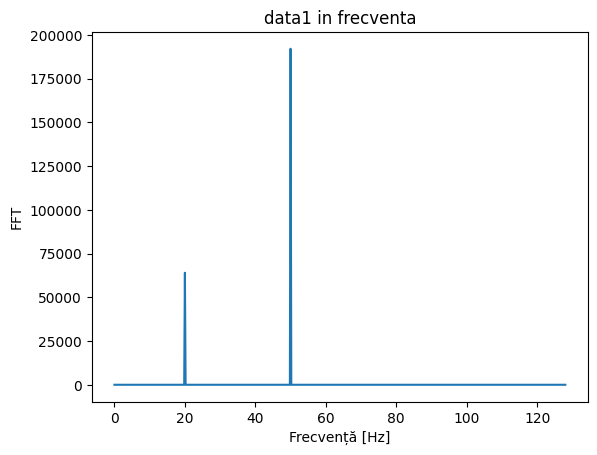

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(1280, 3)


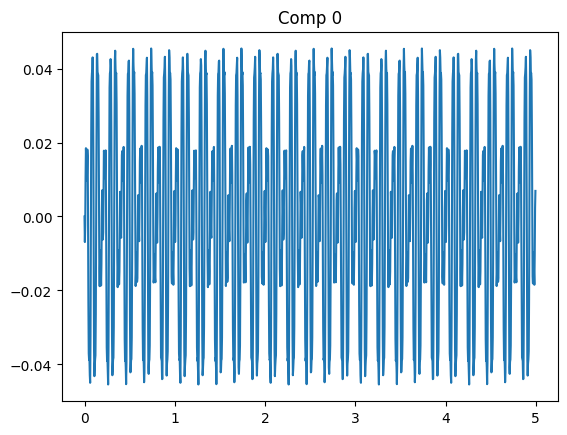

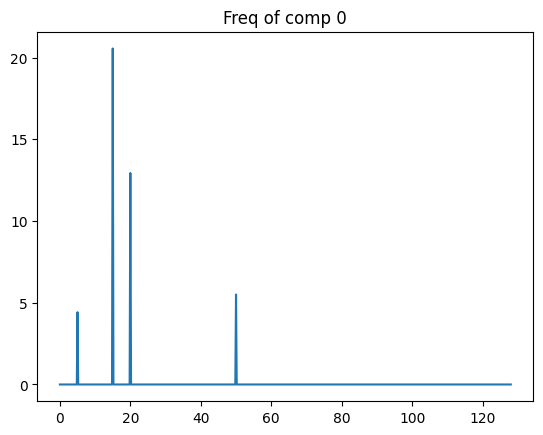

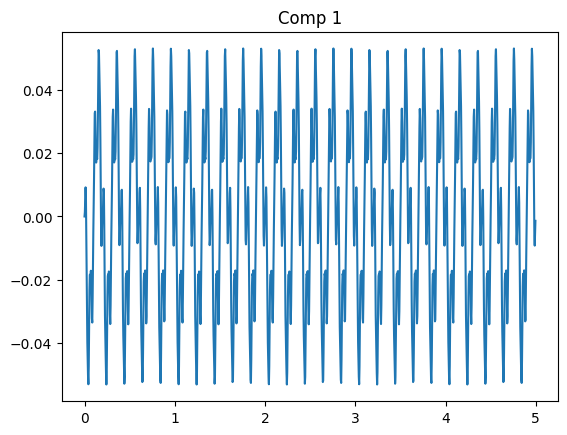

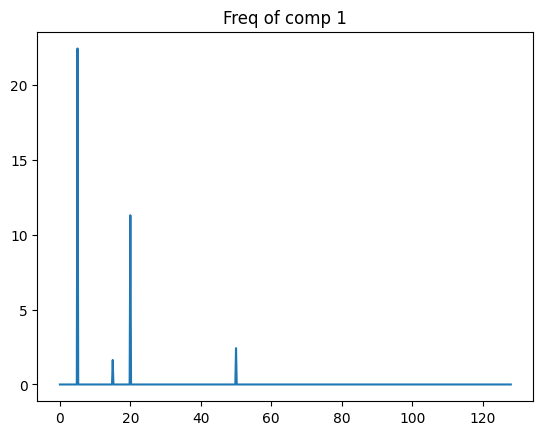

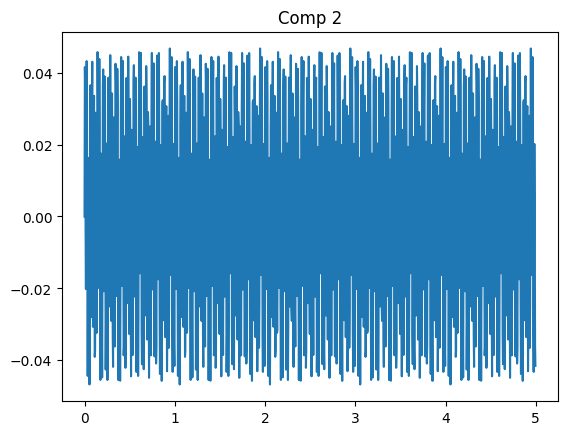

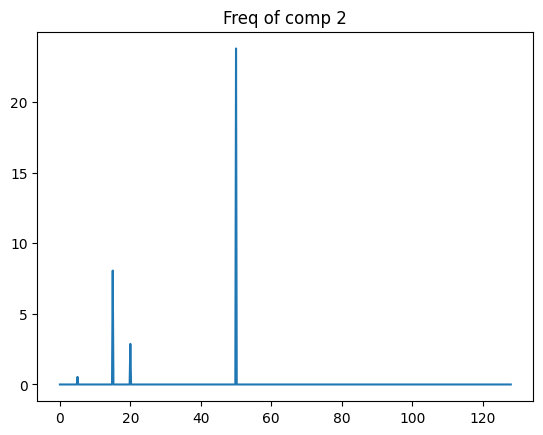

In [36]:
def getsin(fs,f,A,t):
  return A*np.sin(2*np.pi*f * np.arange(0.0,t,1/fs))

fs = 256

t = 5

data1 = getsin(fs,5,170,t)
data2 = getsin(fs,15,150,t)
data3 = getsin(fs,20,100,t)
noise = getsin(fs,50,300,t)

data1 = data1+noise
data2 = data2+noise
data3 = data3+noise

time = np.arange(0.0,t,1/fs)

plt.figure()
plt.plot(time,data1)
plt.title('data1')
plt.show()

data1_f = np.fft.rfft(data1)
x_data_f = np.fft.rfftfreq(len(data1),1/fs)

plt.figure()
plt.plot(x_data_f,np.abs(data1_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('data1 in frecventa')
plt.show()

plt.figure()
plt.plot(time,data2)
plt.title('data2')
plt.show()

data2_f = np.fft.rfft(data2)

plt.figure()
plt.plot(x_data_f,np.abs(data2_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('data1 in frecventa')
plt.show()

plt.figure()
plt.plot(time,data3)
plt.title('data3')
plt.show()

data3_f = np.fft.rfft(data3)

plt.figure()
plt.plot(x_data_f,np.abs(data3_f))
plt.ylabel('FFT')
plt.xlabel('Frecvență [Hz]')
plt.title('data1 in frecventa')
plt.show()


X = np.zeros((len(data1),3))
X[:,0] = data1
X[:,1] = data2
X[:,2] = data3

transformer = FastICA(n_components=3)
X_transformed = transformer.fit_transform(X)

print(np.shape(X_transformed))

for i in range(0,np.shape(X_transformed)[1]):
  plt.figure()
  plt.plot(time,X_transformed[:,i])
  plt.title('Comp ' + str(i))
  plt.show()

  plt.figure()
  plt.plot(np.fft.rfftfreq(len(X_transformed[:,i]),1/fs),np.abs(np.fft.rfft(X_transformed[:,i])))
  plt.title('Freq of comp ' + str(i))
  plt.show()

#Exercițiu 6b
Încărcați toate semnalele înregistrate pe canalul P04 la frecveța de 9Hz.
1. Se poate identifica frecvența de stimulare folosind tehnici Blind Source Separation? Aplicați algoritmul FastICA pe semnalele selectate.
2. Care dintre componentele independente reprezintă cel mai bine semnalul corespunzătpr frecvenței de stimulare? Cum s-ar putea îmbunătăți rezultatul selecției?

(1500, 7)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


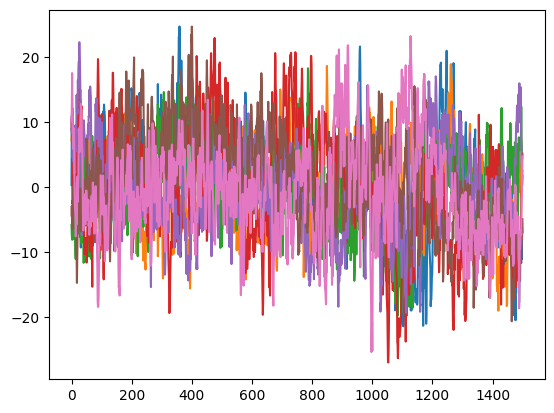

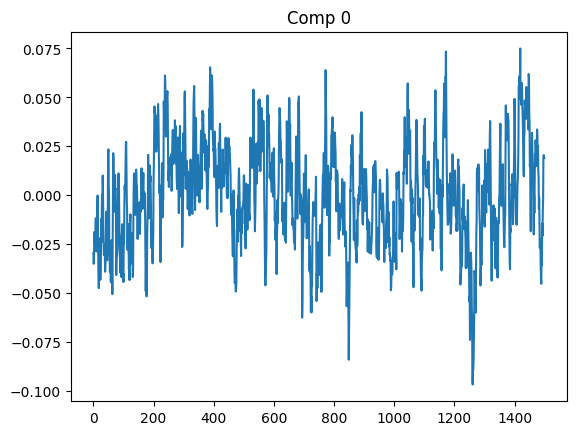

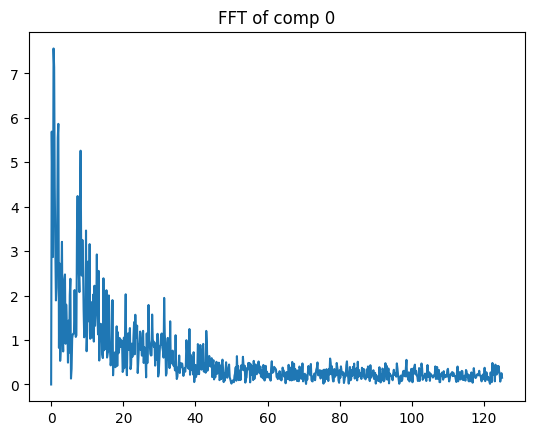

Max amplitude: 7.561542901052454at frequency: [0.66666667] Hz


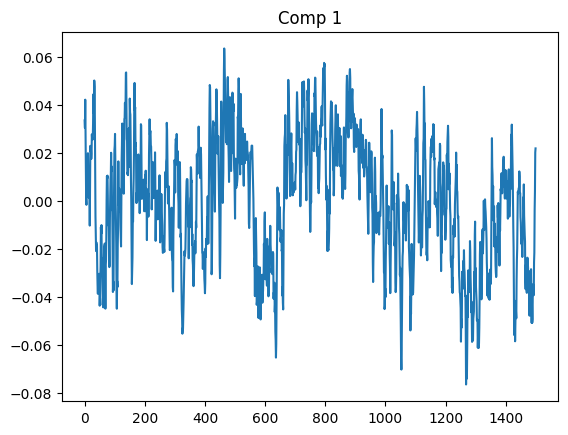

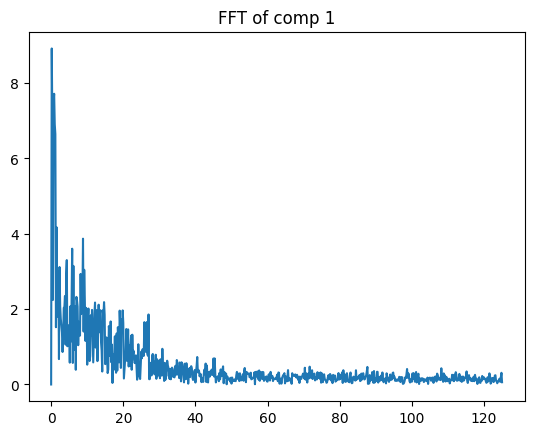

Max amplitude: 8.915204720010276at frequency: [0.16666667] Hz


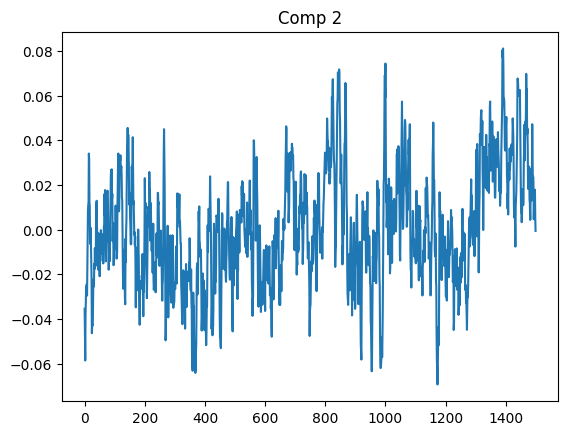

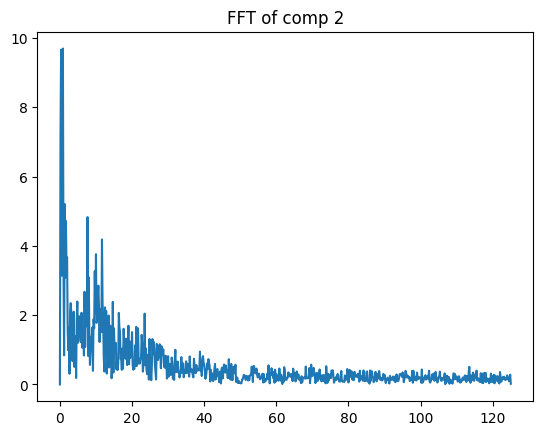

Max amplitude: 9.694016931248372at frequency: [0.83333333] Hz


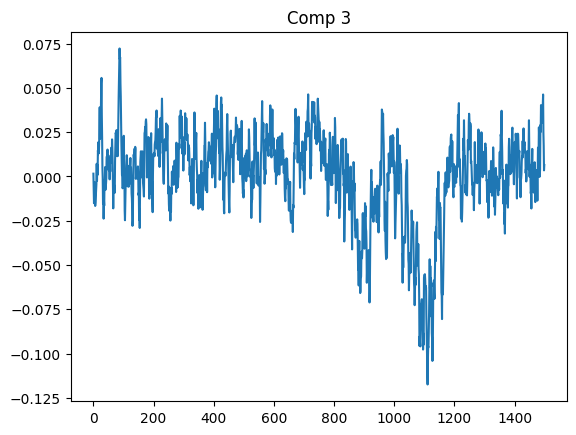

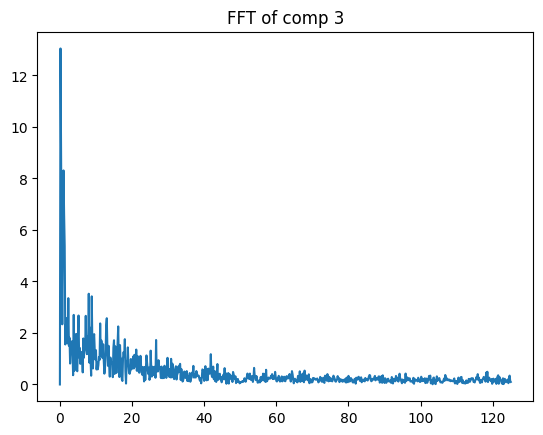

Max amplitude: 13.045516406392478at frequency: [0.16666667] Hz


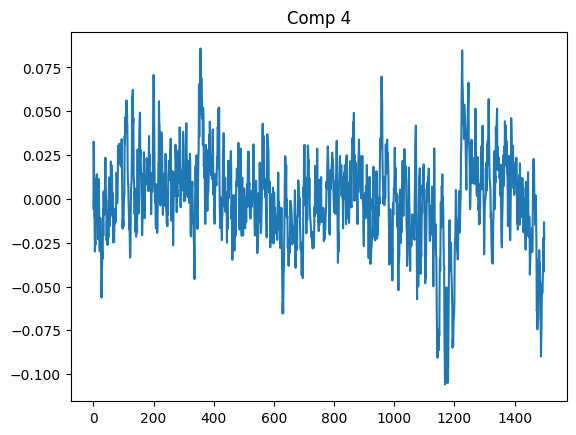

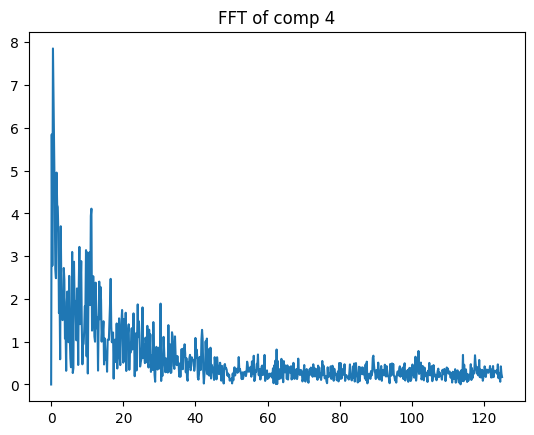

Max amplitude: 7.85641063553489at frequency: [0.5] Hz


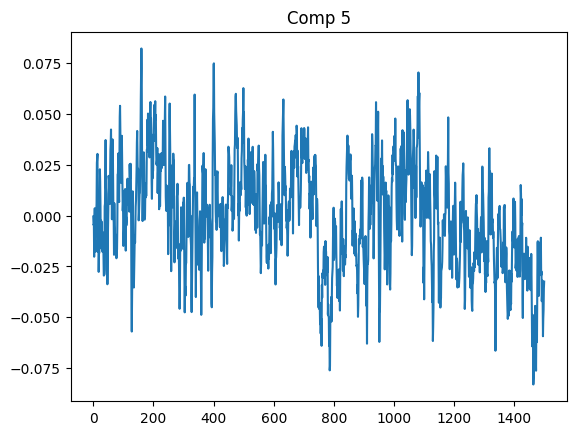

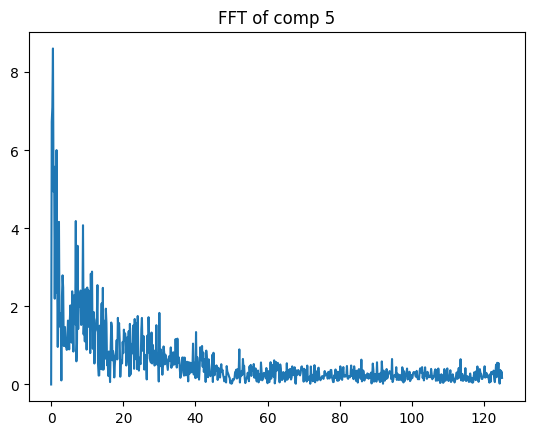

Max amplitude: 8.6116033232888at frequency: [0.5] Hz


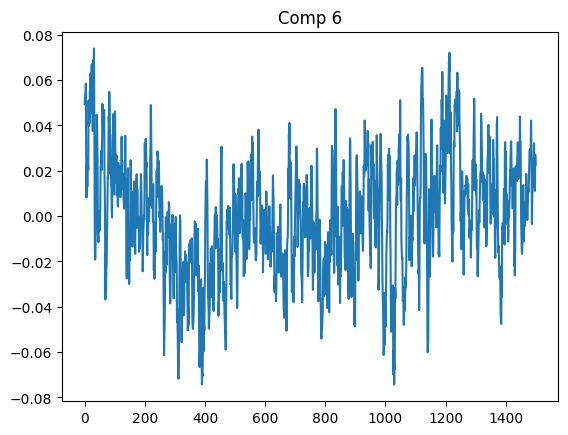

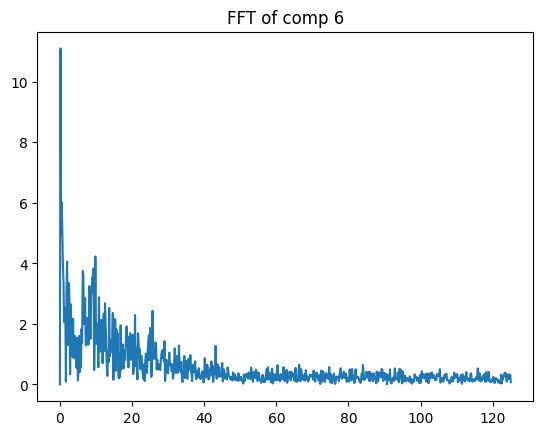

Max amplitude: 11.101217299959522at frequency: [0.16666667] Hz


In [37]:
PO4 = eeg_epochs[56,:,6,:]

fs = info['Srate']

print(np.shape(PO4))

plt.figure()
for i in range(0,np.shape(PO4)[1]):
  plt.plot(PO4[:,i])

transformer = FastICA(n_components=7)
X_transformed = transformer.fit_transform(PO4)

for i in range(0,np.shape(X_transformed)[1]):
  plt.figure()
  plt.plot(X_transformed[:,i])
  plt.title('Comp ' + str(i))
  plt.show()

  fft = np.fft.rfft(X_transformed[:,i])
  x_fft = np.fft.rfftfreq(len(X_transformed[:,i]),1/fs)

  plt.figure()
  plt.plot(x_fft,np.abs(fft))
  plt.title('FFT of comp ' + str(i))
  plt.show()

  max_fft = np.max(abs(fft))
  freq_max = np.where(np.abs(fft) == max_fft)

  print('Max amplitude: ' + str(max_fft) + 'at frequency: ' + str(x_fft[freq_max]) + ' Hz')

#Salvarea datelor in fisier
Salvarea descriptorilor în fișiere csv/în formate mai ușor de manipulat în probleme de clasificare ex. panda



In [46]:
#creati un panda dataframe cu descriptori
mat_contents = sio.loadmat('variables.mat')
data60 = mat_contents['data60']
data5Mix60 = mat_contents['data5Mix60']


Amax = np.max(data60)
Amin = np.min(data60)
Amean = np.mean(data60)
Akurtosis = kurtosis(data60)


AmaxM = np.max(data5Mix60)
AminM = np.min(data5Mix60)
AmeanM = np.mean(data5Mix60)
AkurtosisM = kurtosis(data5Mix60)

d = {'Amax': [Amax, AmaxM], 'Amin': [Amin, AminM], 'Amean': [Amean, AmeanM],'Akurtosis': [Akurtosis, AkurtosisM]}
df = pd.DataFrame(data=d)

print(df)

         Amax        Amin         Amean              Akurtosis
0  100.000000 -100.000000 -1.539509e-14  [-1.5000000000000002]
1  196.521598 -196.521598  2.604167e-01  [-0.7630926400145102]


In [39]:
#salvați descriptorii în fișier .csv
df.to_csv('descriptoriSin.csv')

In [40]:
!ls

descriptoriSin.csv  S1.mat  sample_data  variables.mat


pentru a vizualiza fișierul creat și a salva rezultatele, accesați fișierul din meniul din stânga și salvați fișierul local pe calculator pentru a-l putea utiliza din nou.

#Exercițiu 7
Pentru semnalul EEG normal și cel epileptic, calculați toți descriptori în timp și frecvență de la exercițiile anterioare.
1.   Creați un dataframe panda care să conțină toți descriptorii calculați.
2.   În noul dataframe creat, adăugați o coloană care să reprezinte clasa din care fac parte semnalele astfel:
*   EEG frontal - 0
*   EEG occipital - 1
3.   Salvați dataframe-ul creat într-un fișier .csv






In [44]:
data_f=eeg_epochs[1,:,6,3]

Amax_f = np.max(data_f)
Amin_f = np.min(data_f)
Amean_f = np.mean(data_f)
Akurtosis_f = kurtosis(data_f)
Askew_f = skew(data_f)

data_o = eeg_epochs[-3,:,6,3]

Amax_o= np.max(data_o)
Amin_o = np.min(data_o)
Amean_o = np.mean(data_o)
Akurtosis_o = kurtosis(data_o)
Askew_o = skew(data_o)


d = {'Amax': [Amax_f, Amax_o], 'Amin': [Amin_f, Amin_o], 'Amean': [Amean_f, Amean_o],'Akurtosis': [Akurtosis_f, Akurtosis_o], 'Askew':[Askew_f,Askew_o],'Canal':[0,1]}
df = pd.DataFrame(data=d)

print(df)

df.to_csv('descriptori')

        Amax       Amin     Amean  Akurtosis     Askew  Canal
0  37.672359 -37.154453 -0.094104  -0.079686  0.032053      0
1  37.420300 -28.515337  0.208688  -0.161363  0.251928      1
